# Load data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('ECE 143.csv')
df.set_index(["State"], inplace=True)
df['Population'] = df['Population'].astype(int)
# drop outlier
df = df.drop("California") 
df = df.drop("District of Columbia") # advanced degree outlier

In [66]:
df.head()

,Population,EV Sales\n2015,EV Sales\n2016,EV Sales\n2017,EV Sales\n2018,EV Sales\n2015 % of Total,EV Sales\n2016 % of Total,EV Sales\n2017 % of Total,EV Sales\n2018 % of Total,Avg % of Total Sales 2015-2018,...,Republican Representation,% Green Representation,% Libertarian/ Independent Representation,Median Household Income\t $,Electric Vehicle Tax Credit Program (1/0),Charging Locations,Charging Outlets,Outlets Per Location,EV Stock,EVs to Charging Outlets
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185,197,330,381,866,0.0017,0.0023,0.0020,0.0026,0.0022,...,0.621,0.0044,0.021,56200,0,115,268,2.33,2487,9.28
Alaska,731545,61,94,85,155,0.0005,0.0006,0.0005,0.0005,0.0005,...,0.513,0.0180,0.059,78394,0,16,26,1.62,534,20.54
Arizona,7278717,1658,2265,2976,7086,0.0146,0.0156,0.0158,0.0216,0.0169,...,0.487,0.0133,0.041,70674,1,454,1223,2.69,18129,14.82
Arkansas,3017804,76,138,187,435,0.0007,0.0009,0.0010,0.0013,0.0010,...,0.606,0.0084,0.026,54539,0,72,196,2.72,1194,6.09
Colorado,5758736,1898,2711,4156,7051,0.0168,0.0186,0.0221,0.0215,0.0197,...,0.433,0.0138,0.052,72499,1,692,1857,2.68,19738,10.63


<AxesSubplot:xlabel='sale', ylabel='State'>

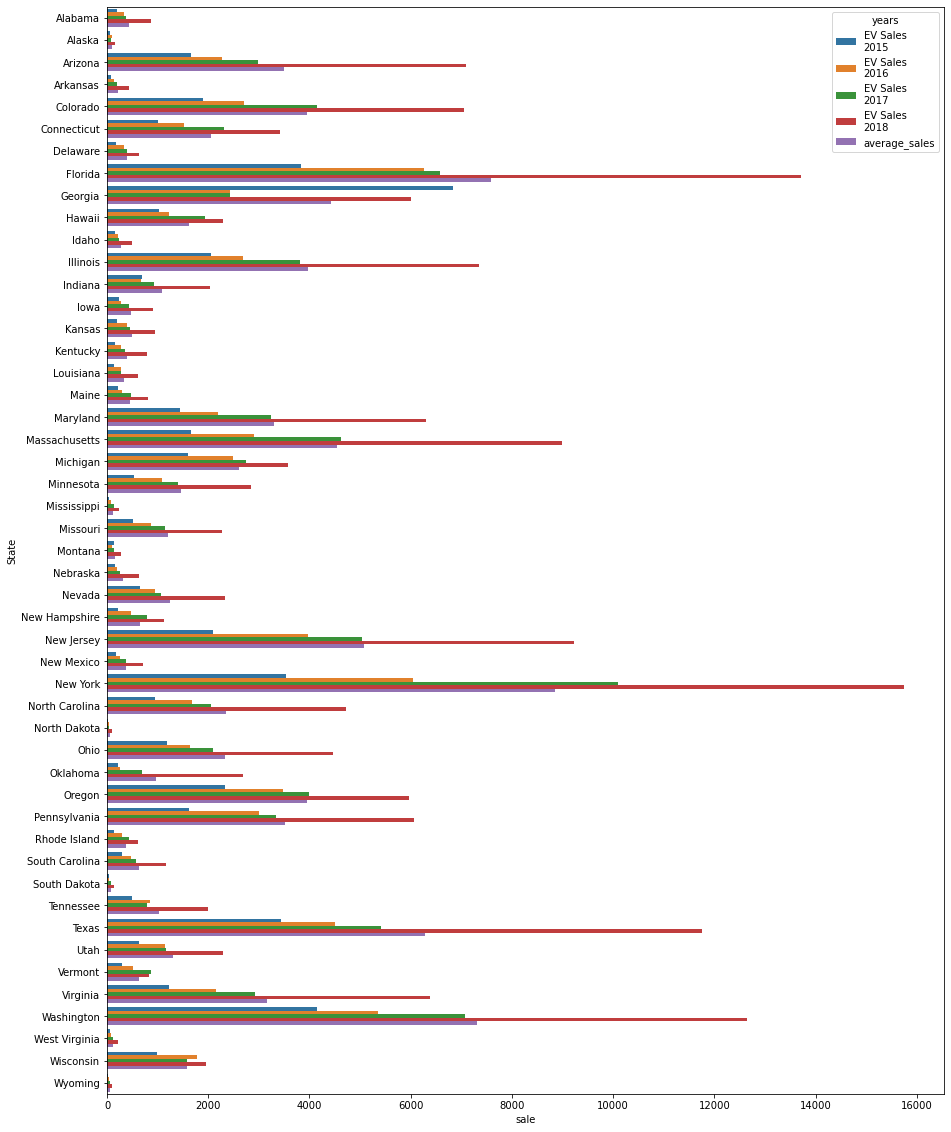

In [67]:
# Compute average sales and add to df
if 'average_sales' not in df:
    df.insert(5, 'average_sales', df.iloc[:,1:5].mean(axis=1).to_frame())
    df['average_sales'] = df['average_sales'].astype(int)
# Plot state sales data
sales_data = df.iloc[:,1:6]
sales_data['State'] = sales_data.index.get_level_values('State')
x=pd.melt(sales_data,id_vars="State", var_name="years", value_name="sale")
y=x.groupby(["State","years"]).sum()
y['State'] = y.index.get_level_values('State')
y['years'] = y.index.get_level_values('years')
plt.figure(figsize=(15,20))
sns.barplot(x='sale', y='State', hue="years",data=y)

'EV Sales\n2015 % of Total'

# Linear regression

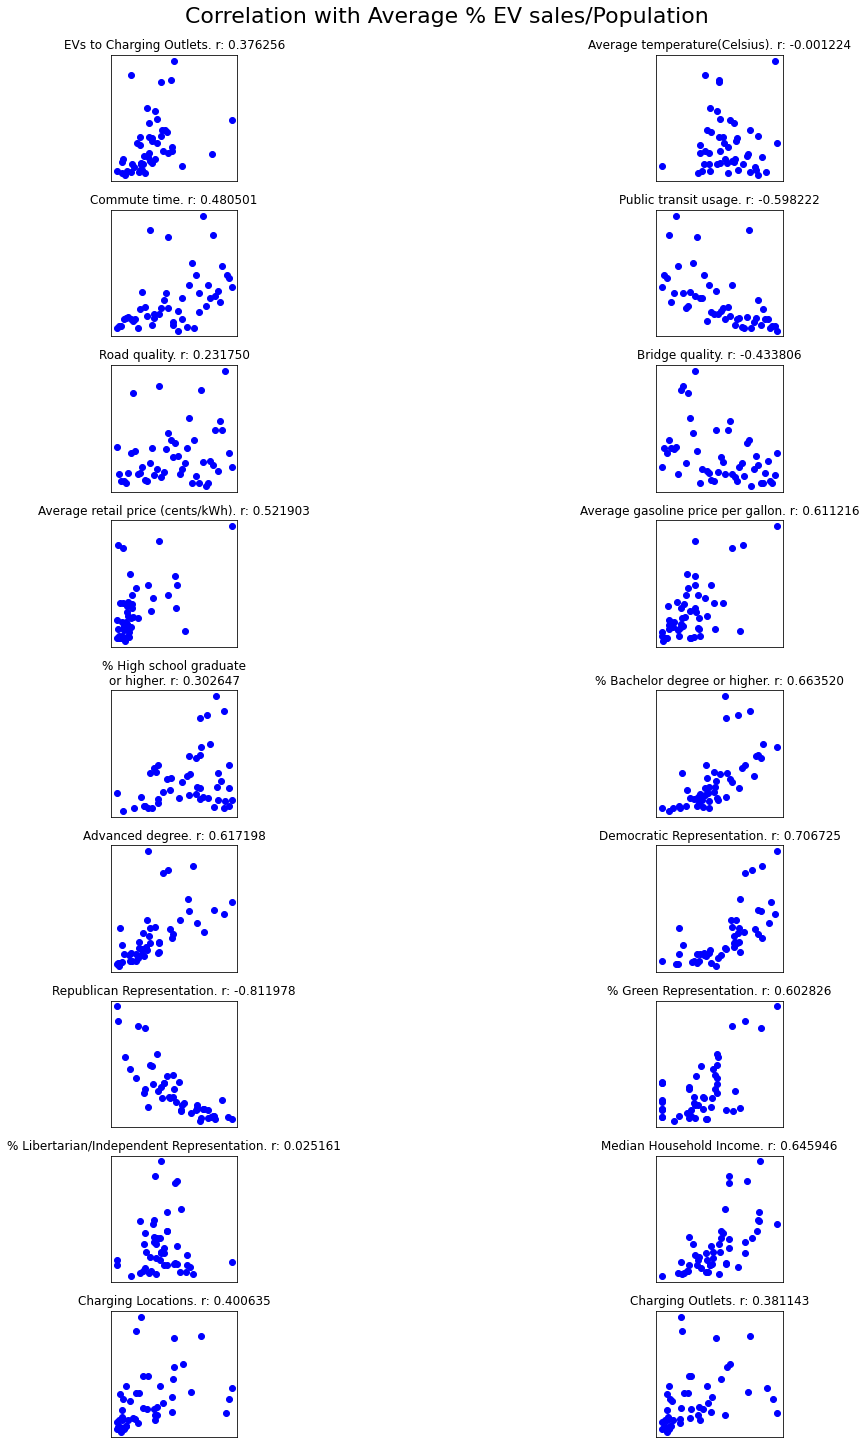

In [90]:
# Adjust columns names
df.rename(columns={"Avg/C": "Average temperature(Celsius)",
                   "Median Household Income\t $": "Median Household Income", 
                   "% Libertarian/ Independent Representation": "% Libertarian/Independent Representation",
                   "Avg gasoline price per gallon": "Average gasoline price per gallon",
                   "COMMUTE TIME": "Commute time",
                   "PUBLIC TRANSIT USAGE": "Public transit usage",
                   "ROAD QUALITY": "Road quality",
                   "BRIDGE QUALITY": "Bridge quality",
                   "% Bachelor's degree\nor higher": "% Bachelor degree or higher"
                   }, inplace=True)

# Correlation plot between average sales and continuous features
avg_sales_per_pop = df['average_sales'] / df['Population']
# avg_sales = df['Avg % of Total Sales 2015-2018']
# avg_sales.apply(lambda x : (x-avg_sales.mean())/avg_sales.std())
cont_features = ['Average temperature(Celsius)', 'Commute time','Public transit usage','Road quality','Bridge quality','Average retail price (cents/kWh)','Average gasoline price per gallon',
             '% High school graduate\nor higher',"% Bachelor degree or higher",'Advanced degree','Democratic Representation','Republican Representation',
             '% Green Representation','% Libertarian/Independent Representation','Median Household Income','Charging Locations',
             'Charging Outlets','Outlets Per Location','EVs to Charging Outlets']
cont_cols = df.loc[:,cont_features]
cont_cols.columns = cont_features
fig, axs = plt.subplots(9, 2,figsize=(15,20),constrained_layout=True)
fig.suptitle("Correlation with Average % EV sales/Population",fontsize=22)
for i in range(18):
    r = i//2
    c = i%2
    # get feature, normalize and plot
    col = cont_cols.iloc[:,i-1].astype(float)
    col=col.apply(lambda x : (x-col.mean())/col.std())
    axs[r, c].plot(col.iloc[:], avg_sales.iloc[:], 'bo')
    # set plot title, showing correlation value
    corr = avg_sales_per_pop.corr(col)
    axs[r, c].set_title("{}. r: {:2f}".format(col.name,corr))
    # format plot
    axs[r, c].xaxis.set_visible(False)
    axs[r, c].yaxis.set_visible(False)
    x0,x1 = axs[r, c].get_xlim()
    y0,y1 = axs[r, c].get_ylim()
    axs[r, c].set_aspect(abs(x1-x0)/abs(y1-y0))

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
Y = df["average_sales"]/df["Population"]
# X = df.loc[:,['Commute time','Public transit usage','Charging Locations', 'Charging Outlets', 'Democratic Representation']]
X = df.loc[:,['Median Household Income','Republican Representation','% Bachelor degree or higher','Democratic Representation','Average gasoline price per gallon']]
# Y = df['Avg % of Total Sales 2015-2018']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# scaled data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(x_train)

# Fit data and print coefficients
lrModel = LinearRegression()
x = X_scaled
y = y_train
lrModel.fit(x,y)
print("Linear Regression score: " + str(lrModel.score(x,y)))
print("Weights:")
for i in range(len(X.columns)):
    print("{}: {}".format(X.columns[i], lrModel.coef_[i]))
print("Bias: " + str(lrModel.intercept_))

x_test_scaled = min_max_scaler.fit_transform(x_test)
pred = lrModel.predict(x_test)
 
result = pd.DataFrame({ 'avg_sale/population': y_test, 'prediction': pred }) 
print("Test values")
print(result)

Linear Regression score: 0.8515849931203401
Weights:
Median Household Income: -0.00040069790439894353
Republican Representation: -0.0008672200210973945
% Bachelor degree or higher: 0.00024292495582387786
Democratic Representation: 3.1907721537263387e-05
Average gasoline price per gallon: 0.0005040018093371199
Bias: 0.0007256400235586139
Test values
                avg_sale/population  prediction
State                                          
New Mexico                 0.000178  -21.280412
Colorado                   0.000687  -29.048320
Nevada                     0.000405  -28.409869
New York                   0.000455  -28.790119
North Dakota               0.000064  -28.059580
Rhode Island               0.000352  -28.107411
Oklahoma                   0.000244  -23.798704
Tennessee                  0.000151  -22.688731
Florida                    0.000354  -23.386169
Idaho                      0.000154  -26.439401
Illinois                   0.000314  -29.809569
North Carolina           

# Decision Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image, display
tree_reg_2 = DecisionTreeRegressor(max_depth=2)
tree_reg_2.fit(x_train,y_train)
export_graphviz( tree_reg_2,
out_file="ev_tree_max_depth_2.dot", feature_names=list(x_train.columns))

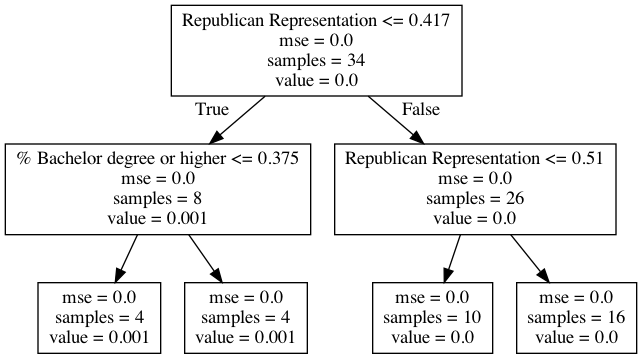

Text(0.5, 0.98, 'Test performance')

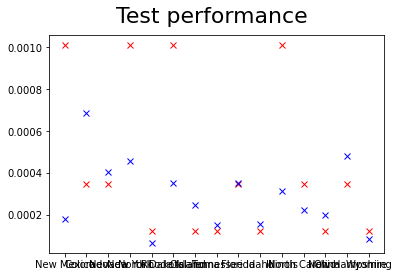

In [121]:
display(Image(filename='ev_tree_2.png'))
pred = tree_reg_2.predict(x_test)
# fig, axs = plt.subplots(2, 2,figsize=(10,15),constrained_layout=True)
plt.plot(pred, 'rx', label='prediction')
plt.plot(y_test, 'bx', label='truth')
plt.suptitle("Test performance",fontsize=22)

In [122]:
tree_reg_3 = DecisionTreeRegressor(max_depth=3)
tree_reg_3.fit(x_train,y_train)
export_graphviz( tree_reg_3,
out_file="ev_tree_max_depth_3.dot", feature_names=list(x.columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

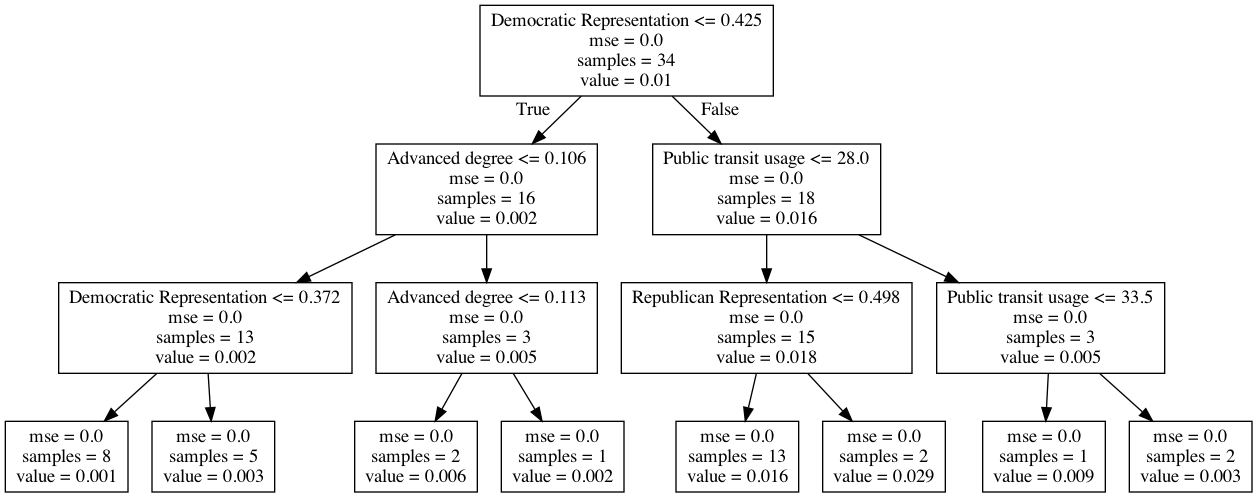

Text(0.5, 0.98, 'Test performance')

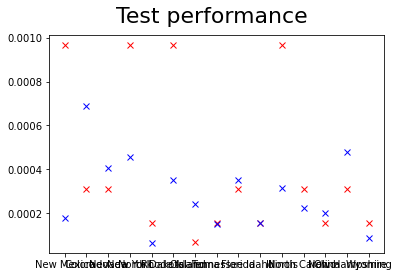

In [123]:
display(Image(filename='ev_tree_3.png'))
pred = tree_reg_3.predict(x_test)
# fig, axs = plt.subplots(2, 2,figsize=(10,15),constrained_layout=True)
# fig.suptitle("Avg sales/total: truth vs. prediction",fontsize=22)
plt.plot(pred, 'rx', label='prediction')
plt.plot(y_test, 'bx', label='truth')
plt.suptitle("Test performance",fontsize=22)

# Random forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
dx = pd.read_csv('ECE 143.csv')
dx=dx.drop(index=[4, 8])
dx['average_sales'] = dx.iloc[:,0:4].mean(axis=1).to_frame()
dx['average_sales']=dx['average_sales'].astype(int)
# dx=dx.iloc[:,[4,13,14,15,16,17]]
dx=dx.iloc[:,[34,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
dx.columns = ['average_sales', 'Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price','Avg gasoline price per gallon',
             'High school graduate or higher','Bachelors degree or higher','Advanced degree','Democratic Representation','Republican Representation',
             'Green Representation','Libertarian/ Independent Representation','Median Household Income','Tax Credit Program','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']


x, y = dx.iloc[:, 1:].values, dx.iloc[:, 0].values
# x, y = dx.iloc[:, 1:].values, Y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.nan_to_num(x_train)
np.nan_to_num(x_test)
np.nan_to_num(y_train)
np.nan_to_num(y_test)
feat_labels = dx.columns[1:]

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:

dx.head()


,average_sales,Avg/C,COMMUTE TIME,PUBLIC TRANSIT USAGE,ROAD QUALITY,BRIDGE QUALITY,Average retail price,Avg gasoline price per gallon,High school graduate or higher,Bachelors degree or higher,...,Republican Representation,Green Representation,Libertarian/ Independent Representation,Median Household Income,Tax Credit Program,Charging Locations,Charging Outlets,Outlets Per Location,EV Stock,EVs to Charging Outlets
0,302,17.1,25.0,43.0,13.0,22.0,9.83,2.54,0.853,0.245,...,0.621,0.0044,0.021,56200,0,115,268,2.33,2487,9.28
1,80,-3.0,8.0,20.0,35.0,36.0,20.22,3.38,0.924,0.290,...,0.513,0.0180,0.059,78394,0,16,26,1.62,534,20.54
2,2299,15.7,32.0,21.0,24.0,4.0,10.52,2.93,0.865,0.284,...,0.487,0.0133,0.041,70674,1,454,1223,2.69,18129,14.82
3,133,15.8,10.0,47.0,36.0,17.0,8.22,2.58,0.856,0.220,...,0.606,0.0084,0.026,54539,0,72,196,2.72,1194,6.09
5,2921,7.3,33.0,14.0,32.0,13.0,10.17,2.81,0.911,0.394,...,0.433,0.0138,0.052,72499,1,692,1857,2.68,19738,10.63


importance： [0.04897226 0.04887659 0.04897652 0.0527415  0.0565578  0.04689592
 0.0495685  0.04848422 0.04875726 0.04723154 0.04781173 0.04690075
 0.04778965 0.04576478 0.04519448 0.01322681 0.04662998 0.04659703
 0.05768894 0.05404529 0.05128844]
 1) Outlets Per Location           0.057689
 2) BRIDGE QUALITY                 0.056558
 3) EV Stock                       0.054045
 4) ROAD QUALITY                   0.052742
 5) EVs to Charging Outlets        0.051288
 6) Avg gasoline price per gallon  0.049569
 7) PUBLIC TRANSIT USAGE           0.048977
 8) Avg/C                          0.048972
 9) COMMUTE TIME                   0.048877
10) Bachelors degree or higher     0.048757
11) High school graduate or higher 0.048484
12) Democratic Representation      0.047812
13) Green Representation           0.047790
14) Advanced degree                0.047232
15) Republican Representation      0.046901
16) Average retail price           0.046896
17) Charging Locations             0.046630
18) 

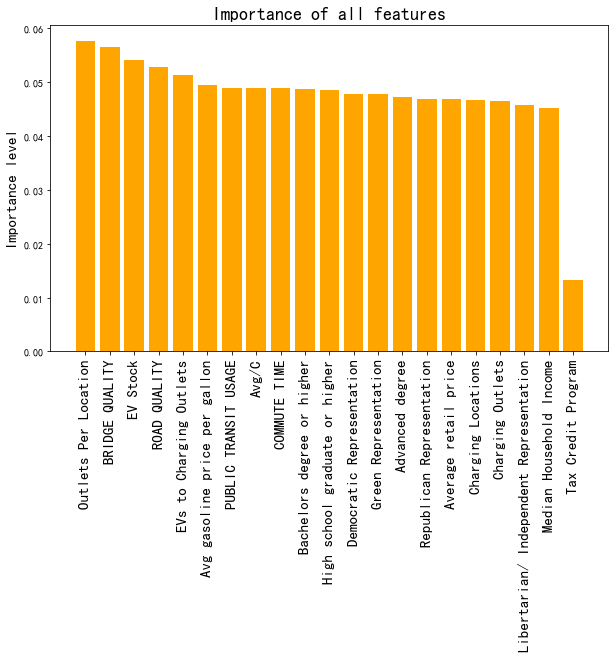

In [73]:
importances = forest.feature_importances_
print("importance：", importances)

x_columns = dx.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])
plt.figure(figsize=(10, 6))
plt.title("Importance of all features", fontsize=18)
plt.ylabel("Importance level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()